In [1]:
#importing essential liabraries for performing EDA and creating visuals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#setting these display options to prevent truncation during output

pd.set_option('display.max_columns', 120)
pd.set_option('display.width', 180)

In [3]:
#importing the final dataset
df = pd.read_csv("myntra_menswear.csv")

In [4]:
df.columns

Index(['brand_name', 'pants_description', 'price', 'MRP', 'discount_percent', 'ratings', 'number_of_ratings', 'effective_discount_percent', 'rating_weighted',
       'value_for_money_score', 'popularity_index'],
      dtype='object')

In [5]:
#converting MPR column name in lowercase
df.rename(columns={"MRP": "mrp"}, inplace=True)

In [6]:
#converting column name 'pants_description' to 'products'
df.rename(columns={"pants_description": "products"}, inplace=True)

In [7]:
df.columns

Index(['brand_name', 'products', 'price', 'mrp', 'discount_percent', 'ratings', 'number_of_ratings', 'effective_discount_percent', 'rating_weighted', 'value_for_money_score',
       'popularity_index'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52120 entries, 0 to 52119
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   brand_name                  52120 non-null  object 
 1   products                    52120 non-null  object 
 2   price                       52120 non-null  float64
 3   mrp                         52120 non-null  float64
 4   discount_percent            52120 non-null  float64
 5   ratings                     52120 non-null  float64
 6   number_of_ratings           52120 non-null  float64
 7   effective_discount_percent  52120 non-null  float64
 8   rating_weighted             52120 non-null  float64
 9   value_for_money_score       52120 non-null  float64
 10  popularity_index            52120 non-null  float64
dtypes: float64(9), object(2)
memory usage: 4.4+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,52120.0,1594.515445,1495.972325,337.000000,989.000000,1439.000000,1829.000000,54000.000000
mrp,52120.0,3180.398438,2201.883218,499.000000,2499.000000,2999.000000,3499.000000,72000.000000
discount_percent,52120.0,1.648256,4.687529,0.020000,0.400000,0.500000,0.630000,64.000000
ratings,52120.0,3.997794,0.420404,1.000000,3.800000,4.000000,4.200000,5.000000
number_of_ratings,52120.0,91.568937,433.918513,5.000000,16.000000,35.000000,74.000000,30700.000000
effective_discount_percent,52120.0,50.555769,14.780993,2.000488,40.011432,50.017864,61.016491,86.135038
rating_weighted,52120.0,14.498543,4.927046,1.791759,10.766211,13.689138,17.459905,40.049547
value_for_money_score,52120.0,3.333369,1.899091,0.075362,2.186987,2.731870,3.850932,12.698413
popularity_index,52120.0,65.054311,15.383491,7.833240,56.579017,64.536892,76.208183,113.551152


In [10]:
#setting up some visual styling for data visualizations for a clean visibility
sns.set(style="whitegrid", context='talk')
plt.rcParams['figure.figsize'] = (10,6)

#### Q1. _**Which brands offer the highest overall value-for-money in the men’s bottomwear category?**_

In [11]:
#calculating mean, median, and count for 'value_for_money_score'

brand_vfm = df.groupby('brand_name')['value_for_money_score'].agg(['mean','median','count']).sort_values('mean', ascending=False)
brand_vfm.head(15)

,mean,median,count
brand_name,,,
Ashtag,10.840108,10.840108,1
COMFITS,9.703202,10.000000,489
LINARIA,9.499433,9.829060,811
MaverIQ,8.867684,8.750000,146
REGY,8.617234,8.617234,1
GUTI,8.617234,8.617234,1
Metronaut,8.029163,8.400541,112
VYNTIQ,7.996946,8.016032,21
Chapter 2,7.899807,7.899807,1


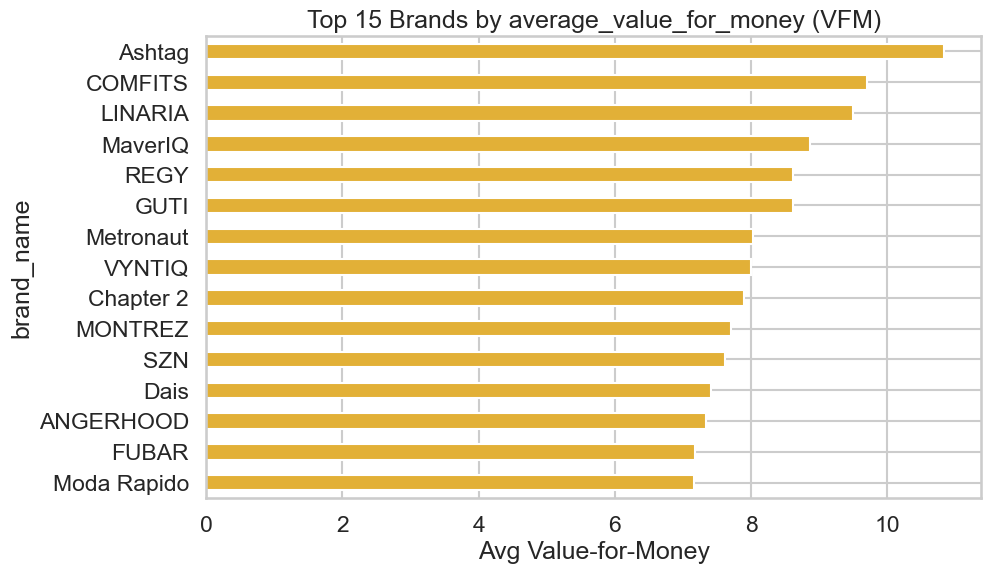

In [12]:
#visual representation for top 15 brand_vfm

brand_vfm['mean'].head(15).plot(kind='barh',color="#e2b037")

plt.xlabel("Avg Value-for-Money")
plt.title("Top 15 Brands by average_value_for_money (VFM)")
plt.gca().invert_yaxis()

#### Q2. _**Which products exhibit high demand despite offering low discounts?**_

In [13]:
#defining thresholds (assuming 65 - 35 ratio)
pop_threshold = df['popularity_index'].quantile(0.65)
low_discount_threshold = df['effective_discount_percent'].quantile(0.35)

#filtering products to find high demand + low discount
high_demand_low_discount = df[
    (df['popularity_index'] >= pop_threshold) &
    (df['effective_discount_percent'] <= low_discount_threshold)]

#filtering top 30 values to avoid overloaded values
result = (high_demand_low_discount[['products', 'brand_name', 'price', 'effective_discount_percent', 'popularity_index']]
    .sort_values('popularity_index', ascending=False))

result.head(30)

,products,brand_name,price,effective_discount_percent,popularity_index
41183,Men Tapered Fit Jeans,HIGHLANDER,1063.0,44.023170,76.782261
12208,Men Slim Fit Jeans,WROGN,1455.0,44.016930,75.573265
45997,Men Slim Fit Jeans,WROGN,1679.0,44.014672,75.381697
46046,Men Slim Fit Jeans,WROGN,1679.0,44.014672,75.381697
95,Men Slim Fit Jeans,Flying Machine,1829.0,39.013004,75.208856
28387,Men Slim Fit Jeans,Flying Machine,1549.0,38.015206,73.964493
11077,Loose Lightweight Jeans,H&M,1511.0,44.016302,73.798124
11076,Men Slim Fit Jeans,WROGN,1511.0,44.016302,73.798124
13011,Men Low-Rise Cotton Jeans,Jack & Jones,5499.0,45.004500,73.748331
2823,Men Slim Fit Jeans,Urbano Fashion,895.0,44.027517,73.262297


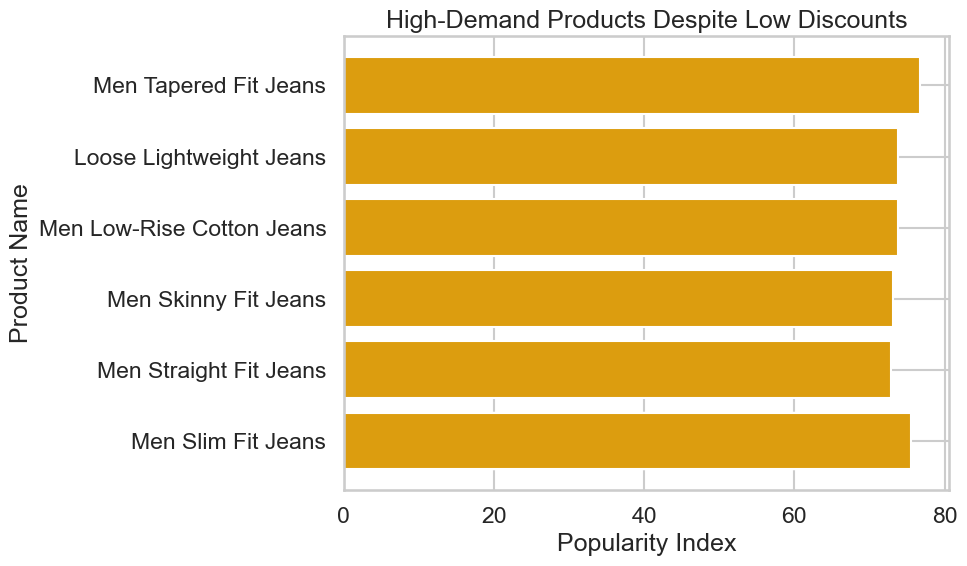

In [14]:
#65/35 is a suitable pick that returns a meaningful insights of 16 products
pop_threshold = df['popularity_index'].quantile(0.65)
low_discount_threshold = df['effective_discount_percent'].quantile(0.35)

#filtering products
high_demand_low_discount = df[
    (df['popularity_index'] >= pop_threshold) &
    (df['effective_discount_percent'] <= low_discount_threshold)]

#sorting for plotting
plot_df = high_demand_low_discount[
    ['products', 'effective_discount_percent', 'popularity_index']
].sort_values('popularity_index', ascending=True)

plt.barh(
    plot_df['products'],
    plot_df['popularity_index'],
    color="#dc9d0f")

plt.xlabel("Popularity Index")
plt.ylabel("Product Name")
plt.title("High-Demand Products Despite Low Discounts")

plt.tight_layout()

#### Q3. _**Which products have high ratings but low trust?**_

In [15]:
#products with high ratings
high_rating = df[df['ratings'] >= 4.5]

#low-trust threshold based on weighted rating
low_trust_threshold = high_rating['rating_weighted'].quantile(0.30)

#high-rating but low-trust products
low_trust_products = high_rating[high_rating['rating_weighted'] <= low_trust_threshold]

top15 = low_trust_products[
    ['products', 'brand_name', 'ratings', 'number_of_ratings', 'rating_weighted']
].sort_values(['ratings', 'rating_weighted'], ascending=[False, True]).head(15)

top15

,products,brand_name,ratings,number_of_ratings,rating_weighted
1,Men Slim Fit Jeans,Flying Machine,4.6,5.0,8.242094
201,Men Slim Fit Jeans,Flying Machine,4.6,5.0,8.242094
251,Men Slim Fit Jeans,Flying Machine,4.6,5.0,8.242094
292,Men Slim Tapered Fit Jeans,WROGN,4.6,5.0,8.242094
301,Men Slim Fit Jeans,Flying Machine,4.6,5.0,8.242094
351,Men Slim Fit Jeans,Flying Machine,4.6,5.0,8.242094
401,Men Slim Fit Jeans,Flying Machine,4.6,5.0,8.242094
451,Men Slim Fit Jeans,Flying Machine,4.6,5.0,8.242094
501,Men Slim Fit Jeans,Flying Machine,4.6,5.0,8.242094
543,Men Relaxed Fit Mid-Rise Jeans,Roadster,4.6,5.0,8.242094


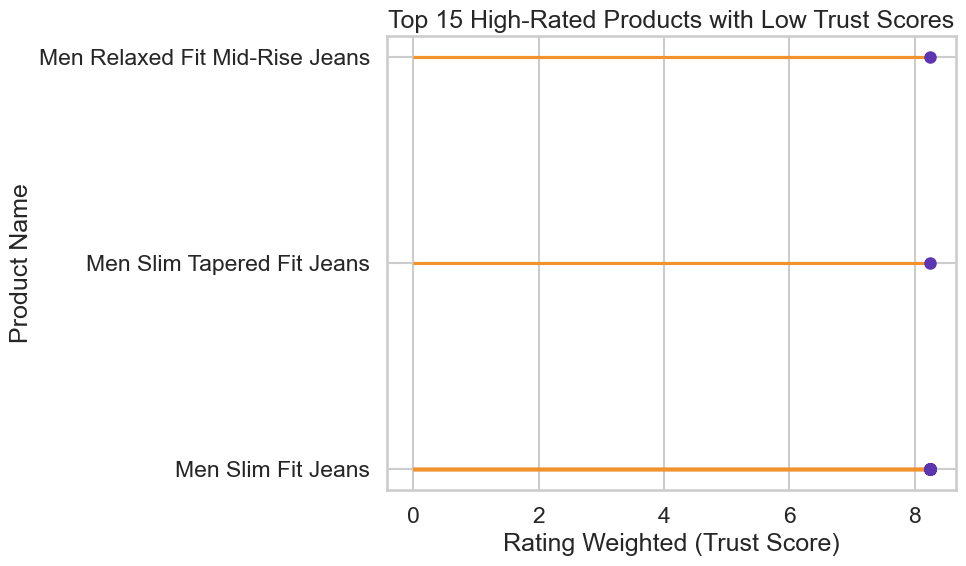

In [16]:
#visualisation to sort products with high ratings but low trust
plot_df = top15.sort_values('rating_weighted', ascending=True)

plt.hlines(
    y=plot_df['products'],
    xmin=0,
    xmax=plot_df['rating_weighted'],
    color='#f2922a')

plt.plot(
    plot_df['rating_weighted'],
    plot_df['products'],"o",
    color="#5E35B1",  
    markersize=8)

plt.xlabel("Rating Weighted (Trust Score)")
plt.ylabel("Product Name")
plt.title("Top 15 High-Rated Products with Low Trust Scores")
plt.tight_layout()

#### Q4. _**What is the optimal discount range that maximizes product popularity across brands?**_

In [17]:
#creating a column 'discount_bin' to categorizes the continuous effective_discount_percent into different ranges
df['discount_bin'] = pd.cut(df['effective_discount_percent'], 
                                bins=[-1,0,10,25,50,100], 
                            labels=['0%','0-10%','10-25%','25-50%','50%+'])

#grouping them by discount_bin to calculate 'count','mean', and 'median'
disc_pop = df.groupby('discount_bin', observed=False)['popularity_index'].agg(['count','mean','median']).reset_index().sort_values('mean', ascending=False)

disc_pop

,discount_bin,count,mean,median
4,50%+,28831,75.227129,75.266677
3,25-50%,21087,55.176650,56.293920
2,10-25%,1460,29.683746,29.795676
1,0-10%,742,20.093077,20.040273
0,0%,0,NaN,NaN


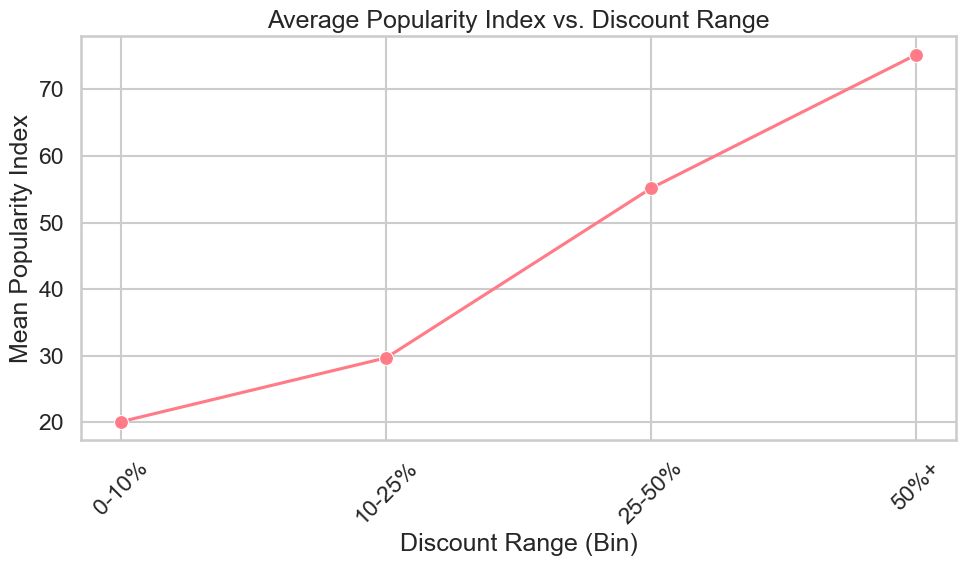

In [18]:
#Visualising the trend using line plot by sorting the disc_pop DataFrame by the values in the 'discount_bin'
disc_pop = disc_pop.sort_values('discount_bin')

sns.lineplot(data=disc_pop, x='discount_bin', y='mean', marker='o', markersize=10, color='#ff7b87')

plt.title('Average Popularity Index vs. Discount Range')
plt.xlabel('Discount Range (Bin)')
plt.ylabel('Mean Popularity Index')
plt.xticks(rotation=45) 
plt.tight_layout()

#### Q5. _**Which products should be promoted during sales campaigns based on product_score drivers?**_

In [19]:
#calculating product_score for every product based on the key metrix to identify the top-scoring products
df['product_score'] = (
    0.40 * ( (df['popularity_index'] - df['popularity_index'].mean()) / df['popularity_index'].std() ) +
    0.25 * ( (df['value_for_money_score'] - df['value_for_money_score'].mean()) / df['value_for_money_score'].std() ) +
    0.25 * ( (df['rating_weighted'] - df['rating_weighted'].mean()) / df['rating_weighted'].std() ) +
    0.10 * ( (df['effective_discount_percent'] - df['effective_discount_percent'].mean()) / df['effective_discount_percent'].std() ))

#listing top 20 products
top20 = df.sort_values('product_score', ascending=False).head(20)
top20[['products','brand_name','price','ratings','number_of_ratings','product_score']]

,products,brand_name,price,ratings,number_of_ratings,product_score
28991,Men Skinny Fit Jeans,Roadster,479.0,3.9,22600.0,3.094104
39367,Men Mid-Rise Regular Fit Jeans,United Colors of Benetton,449.0,3.8,4000.0,3.012864
39366,Men Tapered Fit Jeans,LOCOMOTIVE,449.0,3.8,4000.0,3.012864
44496,Men Anti Fit Mid-Rise Jeans,United Colors of Benetton,449.0,3.6,6000.0,2.938917
44514,Men Slim Fit Jeans,LOCOMOTIVE,449.0,3.6,6000.0,2.938917
44495,Men Slim Fit Jeans,LOCOMOTIVE,449.0,3.6,6000.0,2.938917
44166,Men Tapered Fit Jeans,LOCOMOTIVE,449.0,3.8,2900.0,2.919111
39357,Men Slim Fit Jeans,LOCOMOTIVE,440.0,3.8,2500.0,2.898656
40725,Men Skinny Fit Jeans,Roadster,461.0,3.7,4800.0,2.845213
41397,Men Skinny Fit Jeans,Roadster,475.0,3.9,5800.0,2.827071


Text(0.5, 0, 'Product Score (z-normalized weighted)')

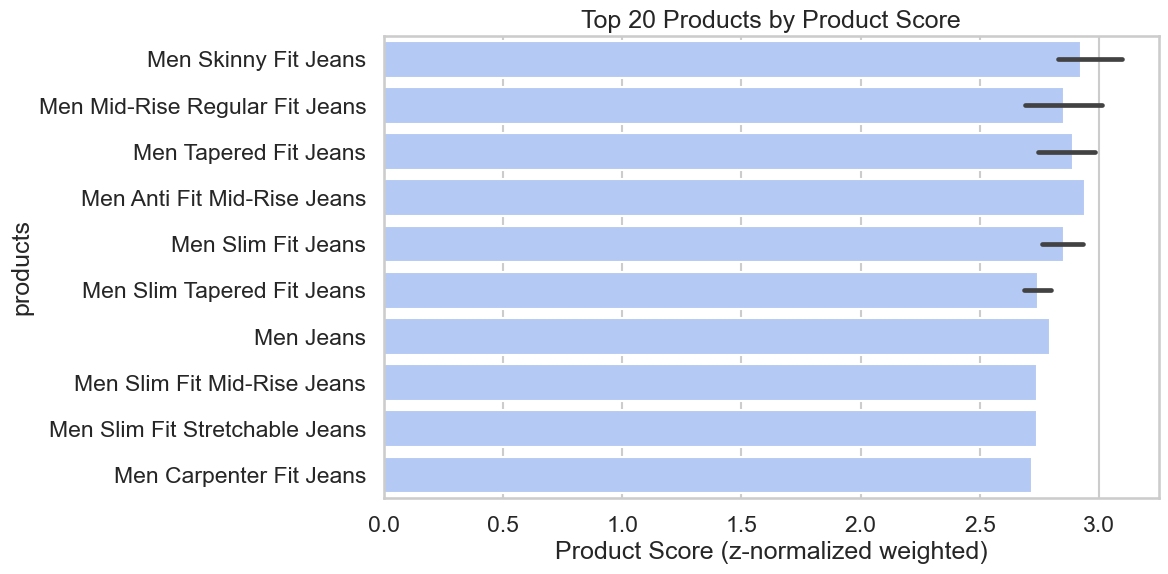

In [21]:
#crafting the visual for top 20 products using barplot
sns.barplot(x='product_score', y='products', data=top20, orient='h', color='#a9c6ff')
plt.title("Top 20 Products by Product Score")
plt.xlabel("Product Score (z-normalized weighted)")

#### _**Q6.Are there any underpriced hidden gems?**_

In [22]:
#calculating median price of all products
price_med = df['price'].median()

#criteria-based products filteration
gems = df[(df['value_for_money_score'] >= df['value_for_money_score'].quantile(0.75)) &
          (df['rating_weighted'] >= df['rating_weighted'].quantile(0.75)) &
          (df['price'] <= price_med)]
gems[['products','brand_name','price','ratings','number_of_ratings','value_for_money_score','rating_weighted']].sort_values(['value_for_money_score','rating_weighted'], ascending=False).head(20)

,products,brand_name,price,ratings,number_of_ratings,value_for_money_score,rating_weighted
24183,Classic Slash Knee Jeans,COMFITS,337.0,4.2,130.0,12.462908,20.475829
24184,Men Slim Fit Mid-Rise Jeans,United Colors of Benetton,337.0,4.2,130.0,12.462908,20.475829
46495,Men Relaxed Fit Jeans,Roadster,359.0,4.3,67.0,11.977716,18.143883
14541,Mid-Rise Slim Fit Jeans,LINARIA,379.0,4.4,165.0,11.609499,22.492746
22976,Men Tapered Fit Mid-Rise Jeans,SZN,376.0,4.3,264.0,11.436170,23.992838
14670,Men Stretchable Jeans,LINARIA,377.0,4.3,264.0,11.405836,23.992838
21327,Men Slim Fit Jeans,LINARIA,377.0,4.3,264.0,11.405836,23.992838
21727,Men Mid-Rise Slim Fit Jeans,LINARIA,377.0,4.3,264.0,11.405836,23.992838
23629,Men Slim Fit Jeans,LINARIA,377.0,4.3,264.0,11.405836,23.992838
24224,Men Jeans,COMFITS,377.0,4.3,264.0,11.405836,23.992838


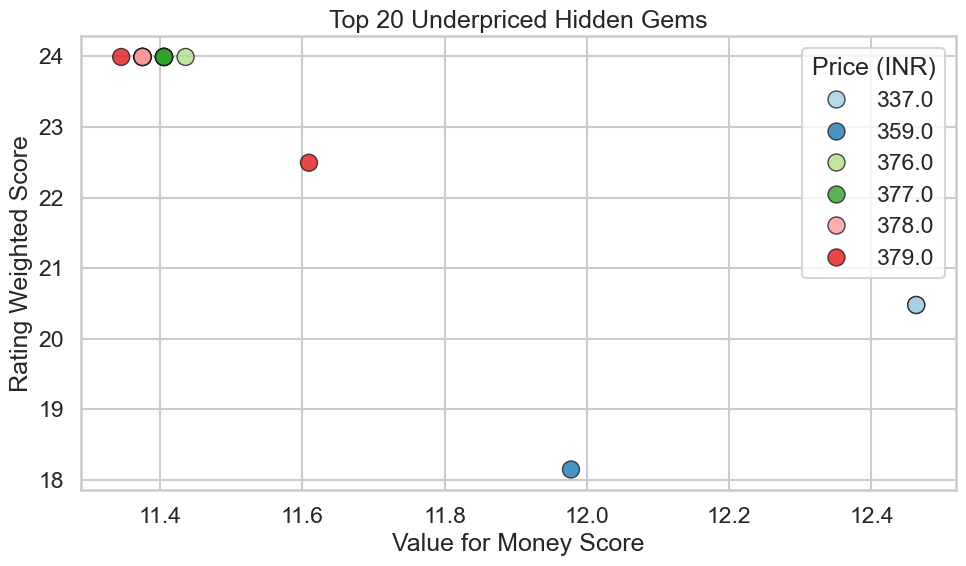

In [23]:
#criteria-based products filteration
gems = df[(df['value_for_money_score'] >= df['value_for_money_score'].quantile(0.75)) &
          (df['rating_weighted'] >= df['rating_weighted'].quantile(0.75)) &
          (df['price'] <= price_med)]

#selecting and sorting values 
gems_display = gems[['products', 'brand_name', 'price', 'ratings', 'value_for_money_score', 'rating_weighted']] \
                    .sort_values(['value_for_money_score', 'rating_weighted'], ascending=False) \
                    .head(20)

scatter = sns.scatterplot(
    data=gems_display,
    x='value_for_money_score',
    y='rating_weighted',
    hue='price',
    palette='Paired', 
    s=150,              
    edgecolor="k",       
    alpha=0.8)

plt.title("Top 20 Underpriced Hidden Gems")
plt.xlabel("Value for Money Score")
plt.ylabel("Rating Weighted Score")

plt.legend(title='Price (INR)')
plt.tight_layout()

#### Q7._**Which brands rely heavily on discounts vs. which rely on product quality and popularity?**_

In [24]:
#grouping the dataset by brands and calculating mean for various categories
brand_profile = df.groupby('brand_name').agg(
    avg_discount=('effective_discount_percent','mean'),
    avg_rating_weighted=('rating_weighted','mean'),
    avg_popularity=('popularity_index','mean'),
    product_count=('products','count')).reset_index()
brand_profile

,brand_name,avg_discount,avg_rating_weighted,avg_popularity,product_count
0,7 For All Mankind,45.387487,13.462992,58.850479,13
1,7OUNCE,55.685228,23.992838,79.678067,3
2,AD By Arvind,38.729692,14.198874,52.928566,123
3,ADBUCKS,56.022409,14.055753,70.078162,8
4,ADIDAS Originals,35.006418,9.977016,44.983434,2
...,...,...,...,...,...
412,mode de base,46.858516,11.007392,57.865909,13
413,nostrum,46.198613,14.408503,60.607116,11
414,prochain,60.026098,18.384348,78.410447,2
415,styzon,51.290876,14.236364,65.527240,77


<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

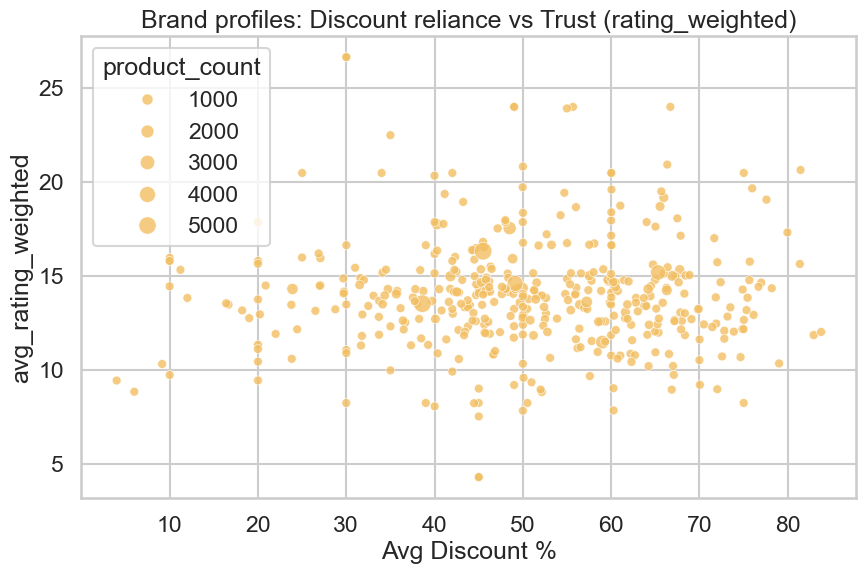

In [25]:
#visual for brand profile
sns.scatterplot(data=brand_profile, x='avg_discount', y='avg_rating_weighted', size='product_count', alpha=0.8, color='#f2be61')
plt.title("Brand profiles: Discount reliance vs Trust (rating_weighted)")
plt.xlabel("Avg Discount %")
plt.ylabel